In [2]:
!sudo mkdir /kaggle/working/data_music
!sudo cp data_music /working

!sudo chmod 600 /kaggle/working/data_music
!sudo chown `whoami`:/kaggle/working/data_music

!export KAGGLE_CONFIG_DIR='/kaggle/working'

cp: -r not specified; omitting directory 'data_music'
chown: missing operand after 'root:/kaggle/working/data_music'
Try 'chown --help' for more information.


In [3]:
import os
import music21 as m21
import pathlib


m21.environment.set('musescoreDirectPNGPath', '/kaggle/working/data_music')


In [4]:
MIDI_DATASET_PATH = "/kaggle/input/classical-music-midi/chopin"

# durations are expressed in quarter length
ACCEPTABLE_DURATIONS = [
    0.25, # 16th note
    0.5, # 8th note
    0.75,
    1.0, # quarter note
    1.5,
    2, # half note
    3,
    4 # whole note
]


def load_songs_in_midi(dataset_path):
    """Loads all kern pieces in dataset using music21.

    :param dataset_path (str): Path to dataset
    :return songs (list of m21 streams): List containing all pieces
    """
    songs = []

    # go through all the files in dataset and load them with music21
    for path, subdirs, files in os.walk(dataset_path):
        for file in files:
            # consider only kern files
            if file[-3:] == "mid":
                song = m21.converter.parse(os.path.join(path, file))
                songs.append(song)
    return songs

In [ ]:
song_list = load_songs_in_midi(MIDI_DATASET_PATH)

/opt/conda/lib/python3.10/site-packages/music21/stream/base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


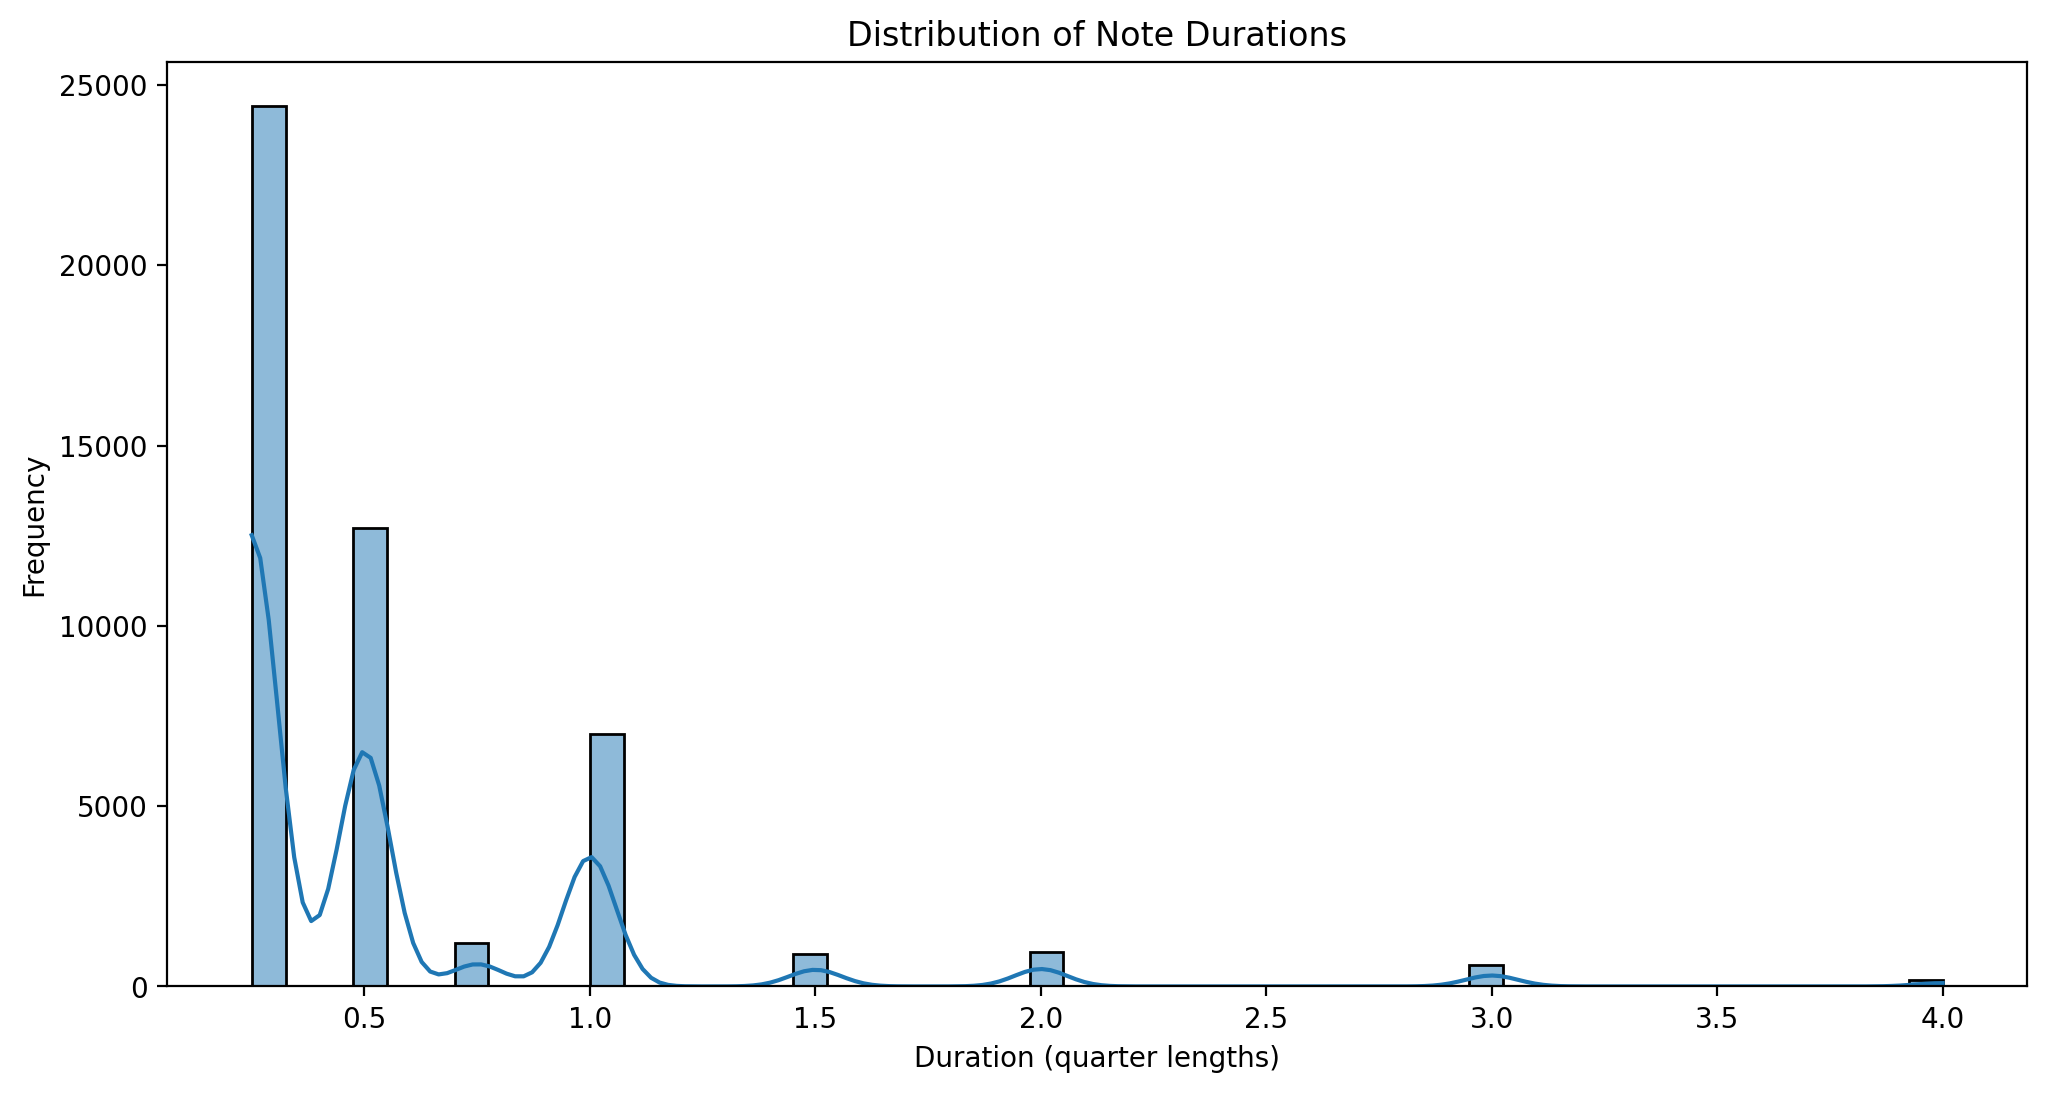

/opt/conda/lib/python3.10/site-packages/music21/stream/base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


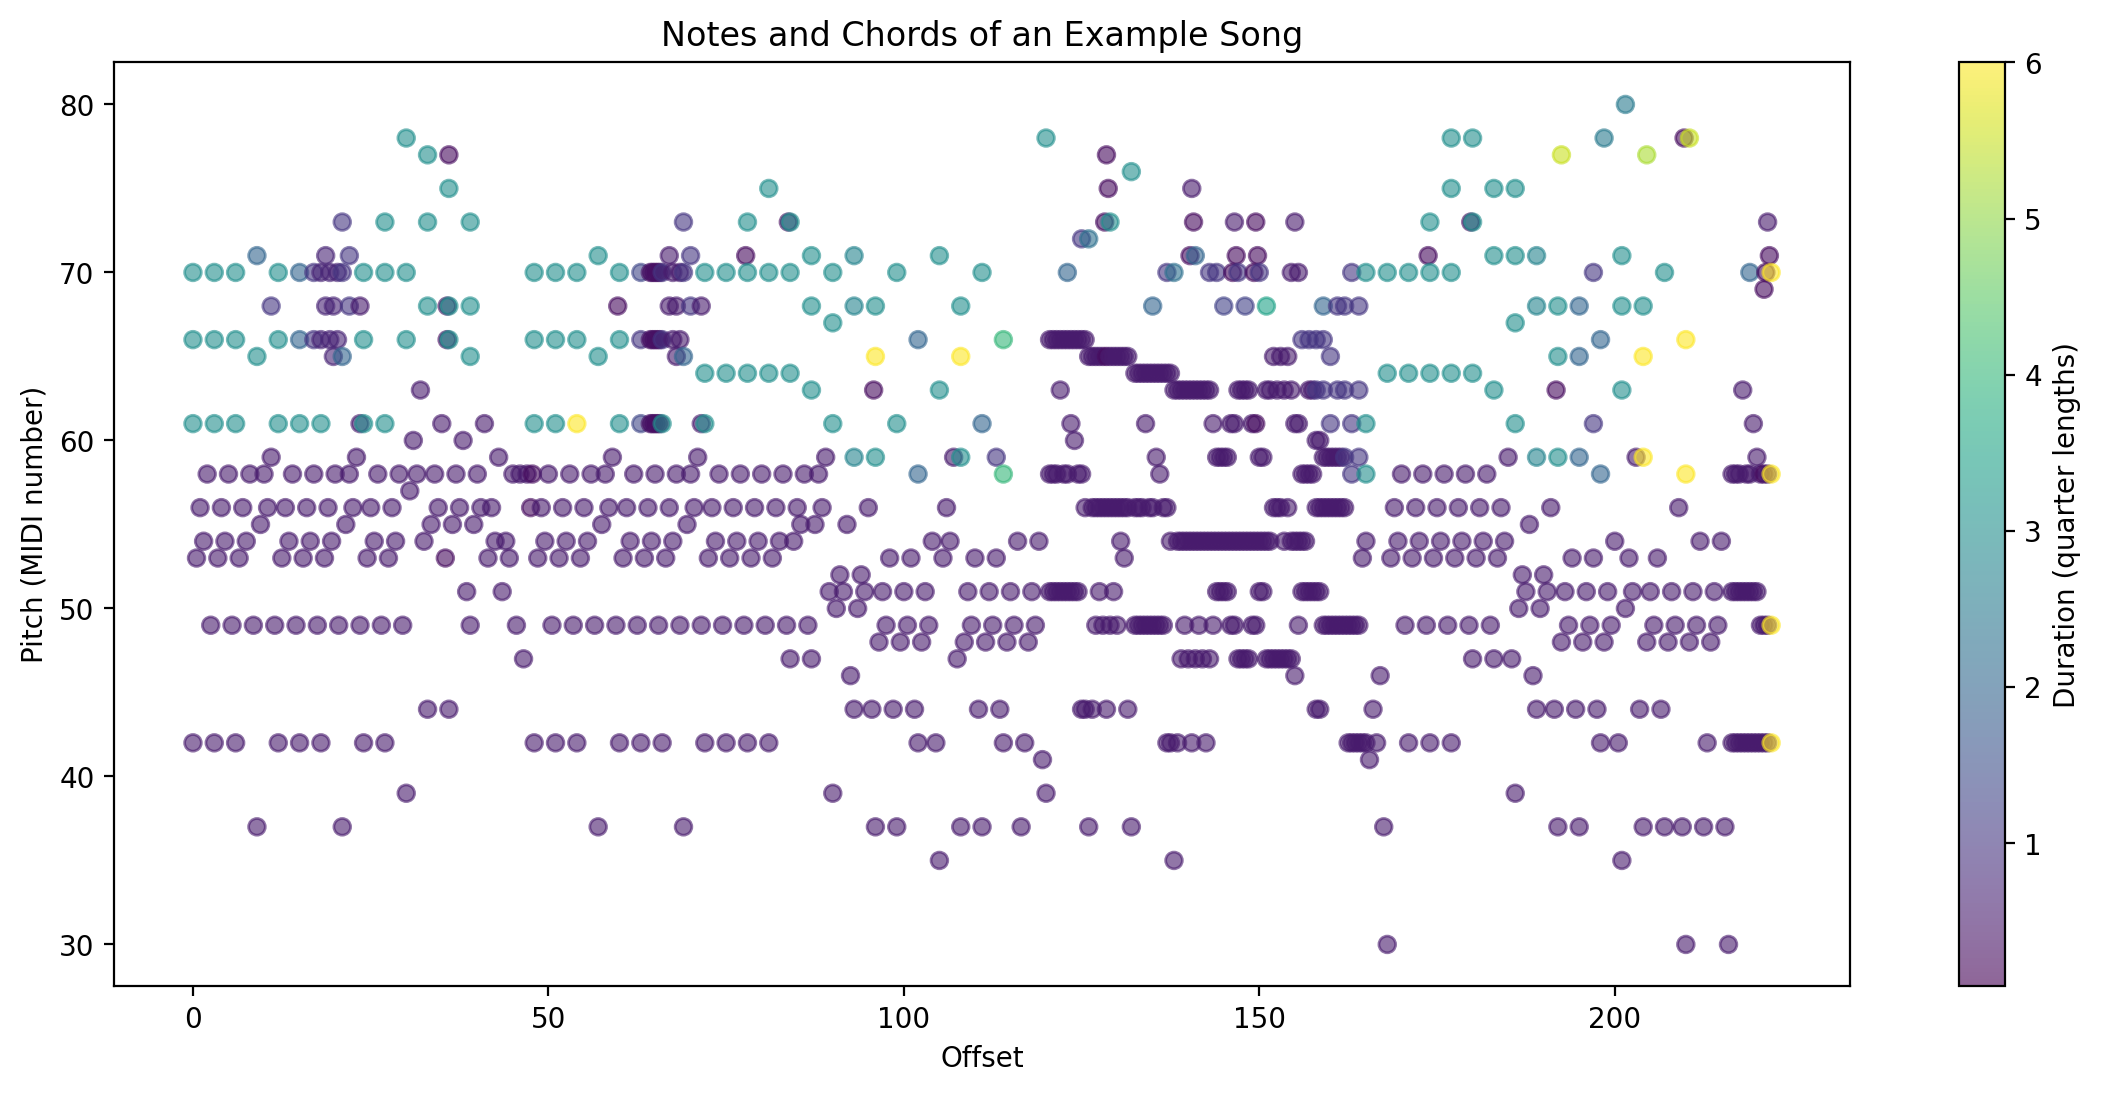

In [6]:
import os
import music21 as m21
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to get note durations from a song
def get_note_durations(song):
    """Extracts note durations from a song."""
    durations = []
    for note in song.flat.notes:
        durations.append(note.quarterLength)
    return durations

# Get durations from all songs
all_durations = []
for song in song_list:
    all_durations.extend(get_note_durations(song))

# Filter out the acceptable durations
filtered_durations = [d for d in all_durations if d in ACCEPTABLE_DURATIONS]

# Plot the distribution of note durations
plt.figure(figsize=(12, 6))
sns.histplot(filtered_durations, bins=50, kde=True)
plt.title('Distribution of Note Durations')
plt.xlabel('Duration (quarter lengths)')
plt.ylabel('Frequency')
plt.show()

# Plot an example MIDI file's notes and chords
def plot_example_song(song):
    """Plots the notes and chords of a song."""
    elements_to_plot = []
    for element in song.flat.notesAndRests:
        if isinstance(element, m21.note.Note):
            elements_to_plot.append((element.offset, element.pitch.midi, element.quarterLength))
        elif isinstance(element, m21.chord.Chord):
            for pitch in element.pitches:
                elements_to_plot.append((element.offset, pitch.midi, element.quarterLength))
        elif isinstance(element, m21.note.Rest):
            elements_to_plot.append((element.offset, None, element.quarterLength))

    offsets, pitches, lengths = zip(*elements_to_plot)
    
    plt.figure(figsize=(14, 6))
    plt.scatter(offsets, pitches, c=lengths, cmap='viridis', alpha=0.6)
    plt.colorbar(label='Duration (quarter lengths)')
    plt.title('Notes and Chords of an Example Song')
    plt.xlabel('Offset')
    plt.ylabel('Pitch (MIDI number)')
    plt.show()

# Plot an example song (change index to explore different songs)
plot_example_song(song_list[0])